In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data/data.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.shape

(1000, 8)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cols:
    print("Categories in",  col, "variable:", end=" ")
    print(df[col].unique())

Categories in gender variable: ['female' 'male']
Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test preparation course variable: ['none' 'completed']


In [13]:
numeric_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df['Total score']=df['math score']+df['reading score']+df['writing score']
df['Average score']=df['Total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Total score', ylabel='Count'>

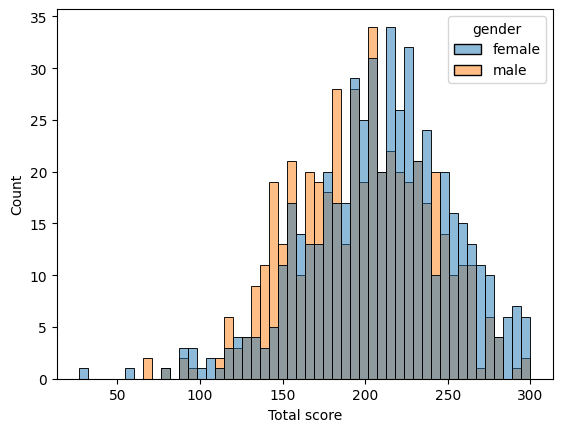

In [46]:
sns.histplot(data=df, x='Total score', hue='gender', bins=50, legend=True)

<Axes: xlabel='Average score', ylabel='Count'>

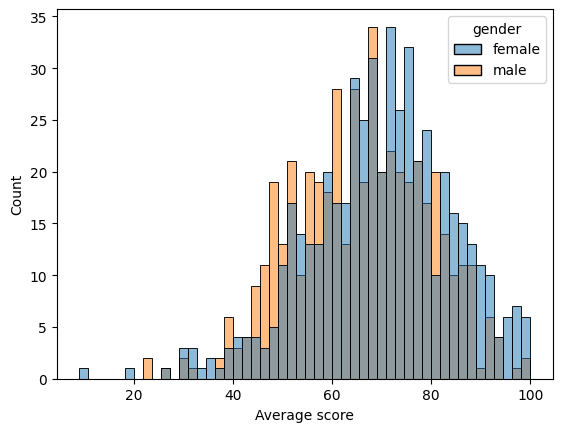

In [47]:
sns.histplot(data=df, x='Average score', hue='gender', bins=50, legend=True)